___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports.

*Note: [we'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)



In [1]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as wb
import matplotlib as plt 
import seaborn as sns

import cufflinks as cf
import plotly.offline as offline
import plotly.graph_objs as go
%matplotlib inline 
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** We will get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks.Than will Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Using datetime to set start and end datetime objects.
2. Figuring out the ticker symbol for each bank.
2. Figuring out how to use datareader to grab info on the stock.


In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [3]:
BAC=wb.DataReader('BAC','yahoo',start,end)
CITI=wb.DataReader('CITI','yahoo',start,end)
GS=wb.DataReader('GS','yahoo',start,end)
JPM=wb.DataReader('JPM','yahoo',start,end)
MS=wb.DataReader('MS','yahoo',start,end)
WF=wb.DataReader('WF','yahoo',start,end)

** Creating a list of the ticker symbols (as strings) in alphabetical order.**

In [4]:
tickers=['BAC','CITI','GS','JPM','MS','WF']

** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Setting the keys argument equal to the tickers list.**

In [5]:
bank_stocks=pd.concat([BAC,CITI,GS,JPM,MS,WF],axis=1,keys=tickers)

** Setting up the column name levels**

In [6]:
bank_stocks.columns.names=['Bank tickers','stock info']

** Checking the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank tickers        BAC                                               \
stock info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank tickers            CITI                 ...         MS             \
stock info    Adj Close High Low Open Close  ...       Open      Close   
Date                                         ...                         
2006-01-03    33.364243  NaN NaN  NaN   NaN  ...  57.169998  58.310001   
2006-01-04    33.009918  NaN NaN  NaN   NaN  ...  58.700001  58.349998   
2006-01-05    33.052410  NaN NaN  NaN   NaN  ...  58.549999  58.509998   
2006-01-06    33.002815  NaN NaN  NaN   NaN  ...  58.770000  58.570000   
2006-01-09    33.024067  NaN NaN  NaN   NaN  ...  58.630001  59.189999   

Bank tickers                               WF                        \
stock info       Volume  Adj Close       High        Low       Open   
Date                                                                  
2006-01-03    5377000.0  34.886650  73.766388  72.228844  72.705605   
2006-01-04    7977800.0  34.910568  74.719902  72.884384  73.122765   
2006-01-05    5778000.0  35.006306  73.420738  72.526817  73.003578   
2006-01-06    6889800.0  35.042191  76.769966  73.897499  73.897499   
2006-01-09    4144500.0  35.413139  75.268173  74.195473  74.493446   

Bank tickers                                 
stock info        Close   Volume  Adj Close  
Date                                         
2006-01-03    72.884384  23408.0  72.381088  
2006-01-04    74.016685  27268.0  73.505569  
2006-01-05    72.669846  11075.0  72.168030  
2006-01-06    75.744934  34819.0  75.221886  
2006-01-09    74.195473  30959.0  73.683121  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit!.

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close',axis=1,level='stock info').max()

Bank tickers
BAC      54.900002
CITI      5.800000
GS      247.919998
JPM      70.080002
MS       89.300003
WF       99.868889
dtype: float64

In [9]:
for i in tickers:
    print(i +'    = ',bank_stocks[i]['Close'].max())

BAC    =  54.900001525878906
CITI    =  5.800000190734863
GS    =  247.9199981689453
JPM    =  70.08000183105469
MS    =  89.30000305175781
WF    =  99.86888885498047


** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Using a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
from matplotlib.pyplot import axis
for i in tickers:
    returns[i +' return']=bank_stocks[i]['Close'].pct_change()
returns[1:]


,BAC return,CITI return,GS return,JPM return,MS return,WF return
Date,,,,,,
2006-01-04,-0.010620,NaN,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,NaN,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,NaN,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,NaN,0.012030,0.016242,0.010586,-0.020456
2006-01-10,-0.008369,NaN,0.012578,0.001475,0.000507,-0.038554
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.0,-0.002624,-0.001948,-0.003681,0.005530
2015-12-28,-0.008107,0.0,-0.004658,-0.003303,-0.009544,0.001269
2015-12-29,0.008757,0.0,0.010516,0.010395,0.011812,-0.030841


** Creating a pairplot using seaborn of the returns dataframe. Does any stock stands out? Can we figure out why?**

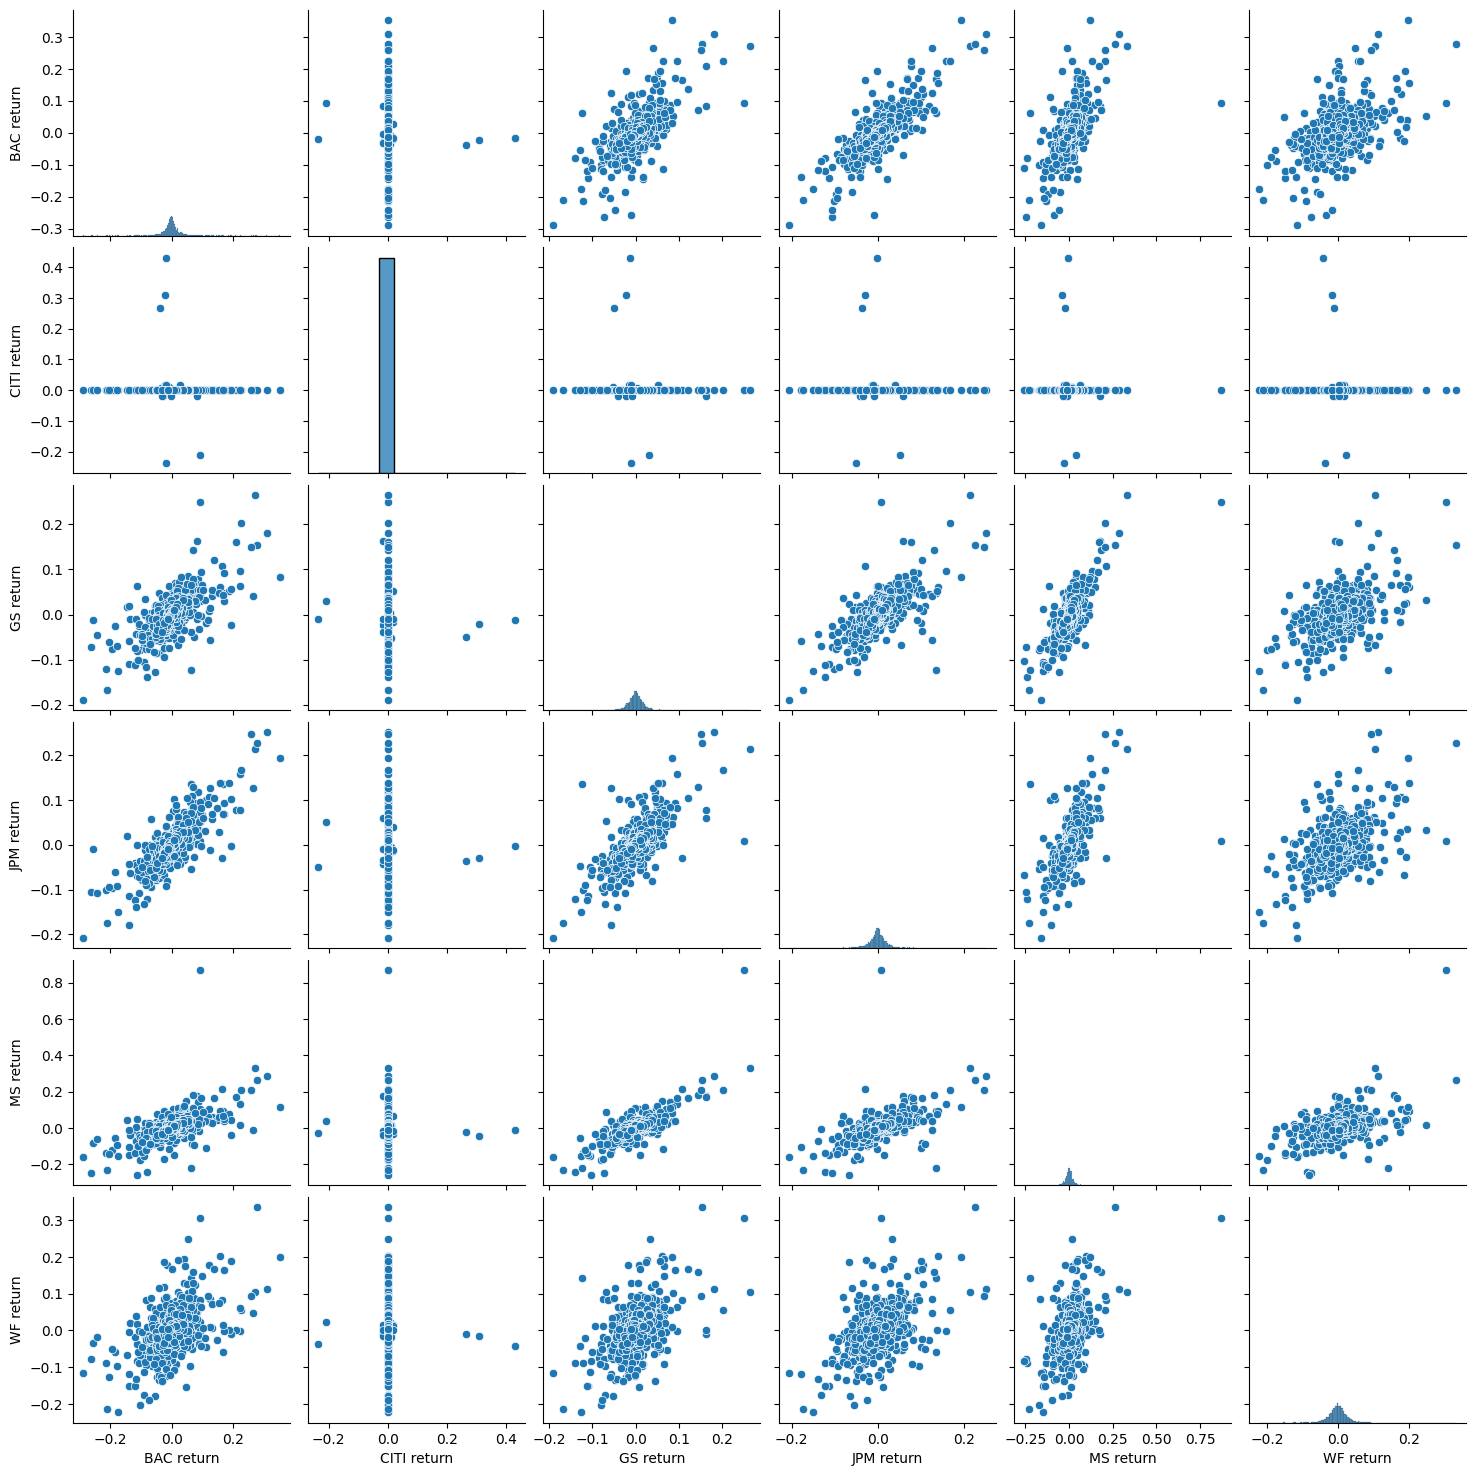

In [12]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figuring out on what dates each bank stock had the best and worst single day returns. We noticed that 3 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [13]:
returns.idxmin()

BAC return    2009-01-20
CITI return   2008-05-20
GS return     2009-01-20
JPM return    2009-01-20
MS return     2008-10-09
WF return     2008-09-29
dtype: datetime64[ns]

In [14]:
returns.idxmax()

BAC return    2009-04-09
CITI return   2008-02-21
GS return     2008-11-24
JPM return    2009-01-21
MS return     2008-10-13
WF return     2009-03-10
dtype: datetime64[ns]

** We noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

** Taking a look at the standard deviation of the returns, and figuring out which stock should be classified as the riskiest over the entire time period? Which should be classified as the riskiest for the year 2015?**

In [15]:
returns.std()

BAC return     0.036647
CITI return    0.013613
GS return      0.025390
JPM return     0.027667
MS return      0.037819
WF return      0.035348
dtype: float64

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\hchou\AppData\Local\Temp\ipykernel_16992\1711846175.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='MS return', ylabel='Density'>

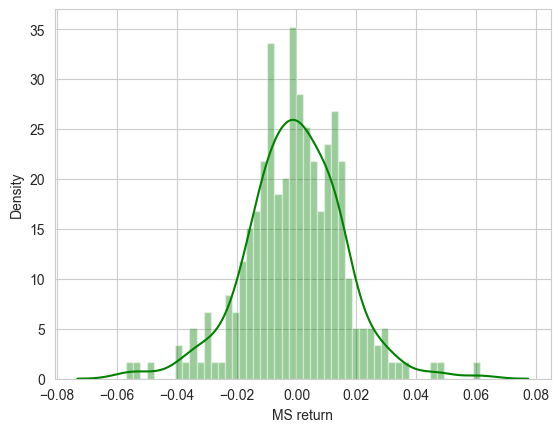

In [16]:
sns.set_style('whitegrid')

sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS return'],bins=50,color='g')


** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\hchou\AppData\Local\Temp\ipykernel_16992\1057260571.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='CITI return', ylabel='Density'>

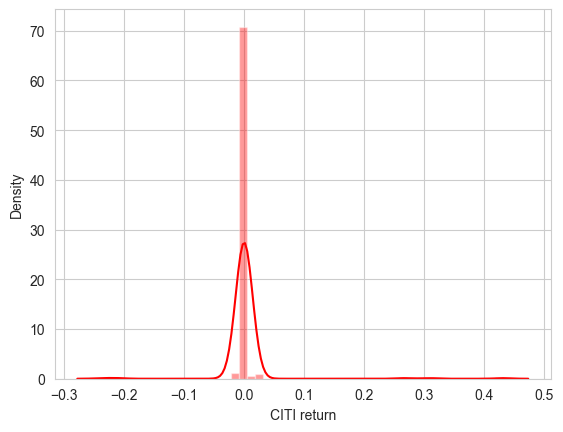

In [17]:

sns.distplot(returns.loc['2008':'2008']['CITI return'],color='r',bins=50)

____
# More Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Creating a line plot showing Close price for each bank for the entire index of time.**

<AxesSubplot: xlabel='Date'>

<Figure size 1000x400 with 0 Axes>

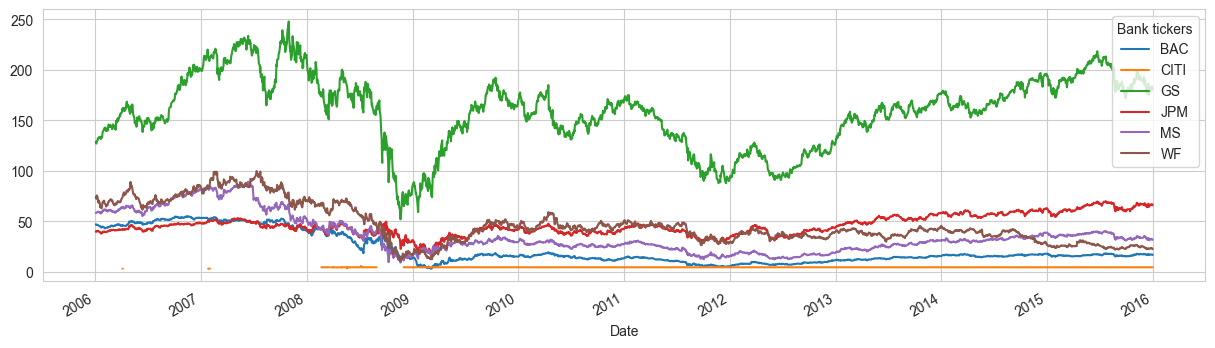

In [33]:
plt.figure(figsize=(10,4))

bank_stocks.xs(key='Close',axis=1,level='stock info').plot(figsize=(15,4))

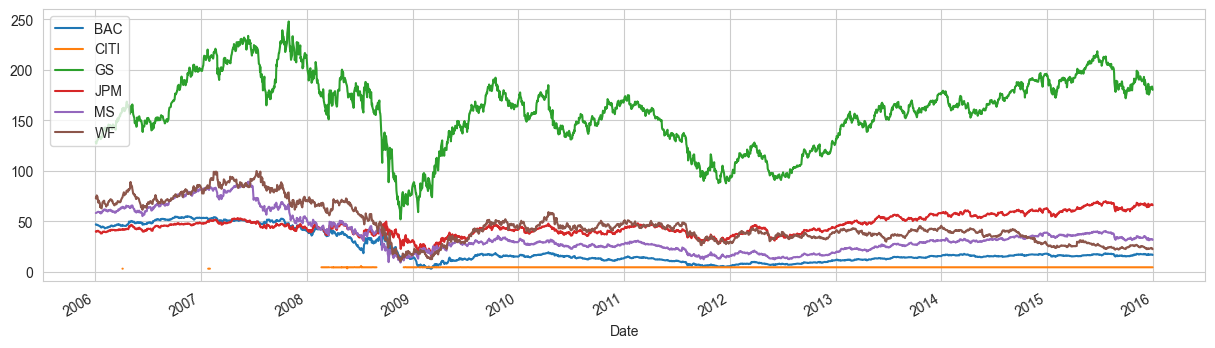

In [20]:
for i in tickers:
    bank_stocks[i]['Close'].plot(figsize=(15,4),label=i)
plt.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

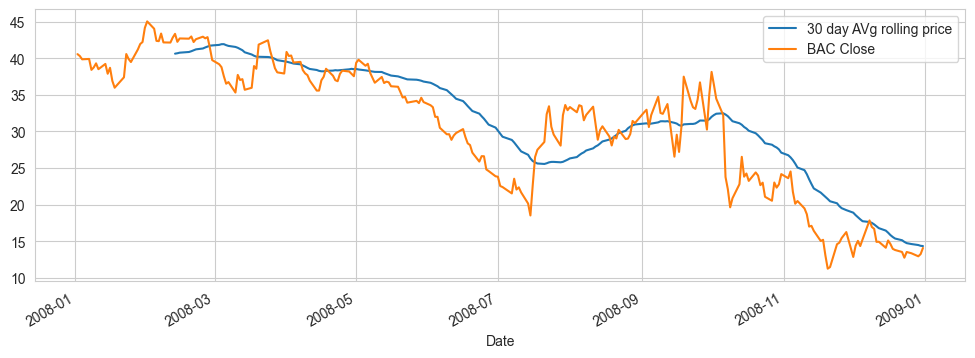

In [21]:
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(figsize=(12,4),label="30 day AVg rolling price")
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label="BAC Close")
plt.legend()

** Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot: xlabel='Bank tickers', ylabel='Bank tickers'>

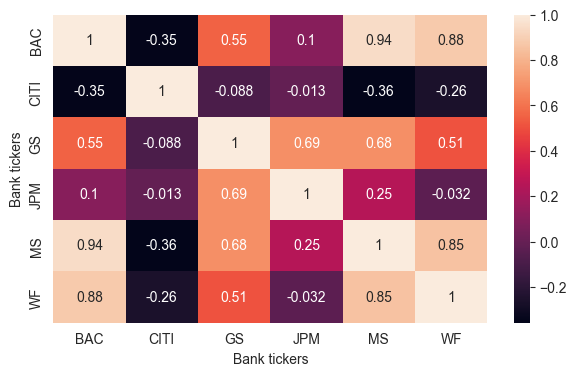

In [22]:
plt.figure(figsize=(7,4))

sns.heatmap(bank_stocks.xs(key='Close',axis=1,level="stock info").corr(),annot=True)

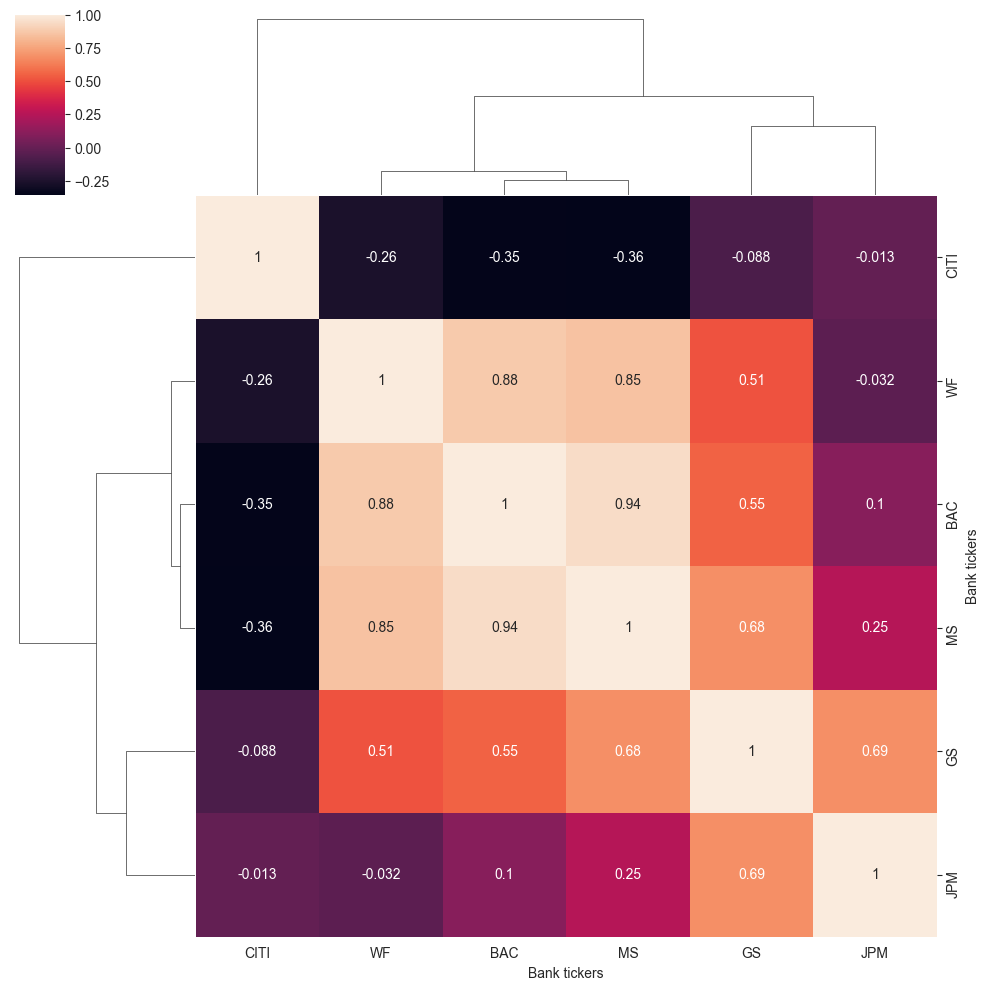

In [34]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level="stock info").corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [25]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [31]:
bank_stocks['MS'].loc['2015':'2015'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [32]:
bank_stocks['MS'].loc['2015':'2015'].ta_plot(study='boll')